In [1]:
import torch
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('../')
from transformer_lm.modeling_transformer import TransformerEncoderLayer, TransformerEncoder, TransformerLM

# Transformer Encoder Layer

Complete `TransformerEncoderLayer` in `transformer_lm/modeling_transformer.py` which accepts `FloatTensor[batch_size, seq_len, input_size]` and returns `FloatTensor[batch_size, seq_len, hidden]`.

You need to use your `MultiHeadSelfAttention` module here (import it from `transformer_lm.modeling_transformer`) to get the attention and then use residual connections, layer norm and feed forward networks to build encoder layer/block.



Extra: can you implement .forward in 6 lines of pytorch code?

**Note**: sometimes these are also called Transformer Block

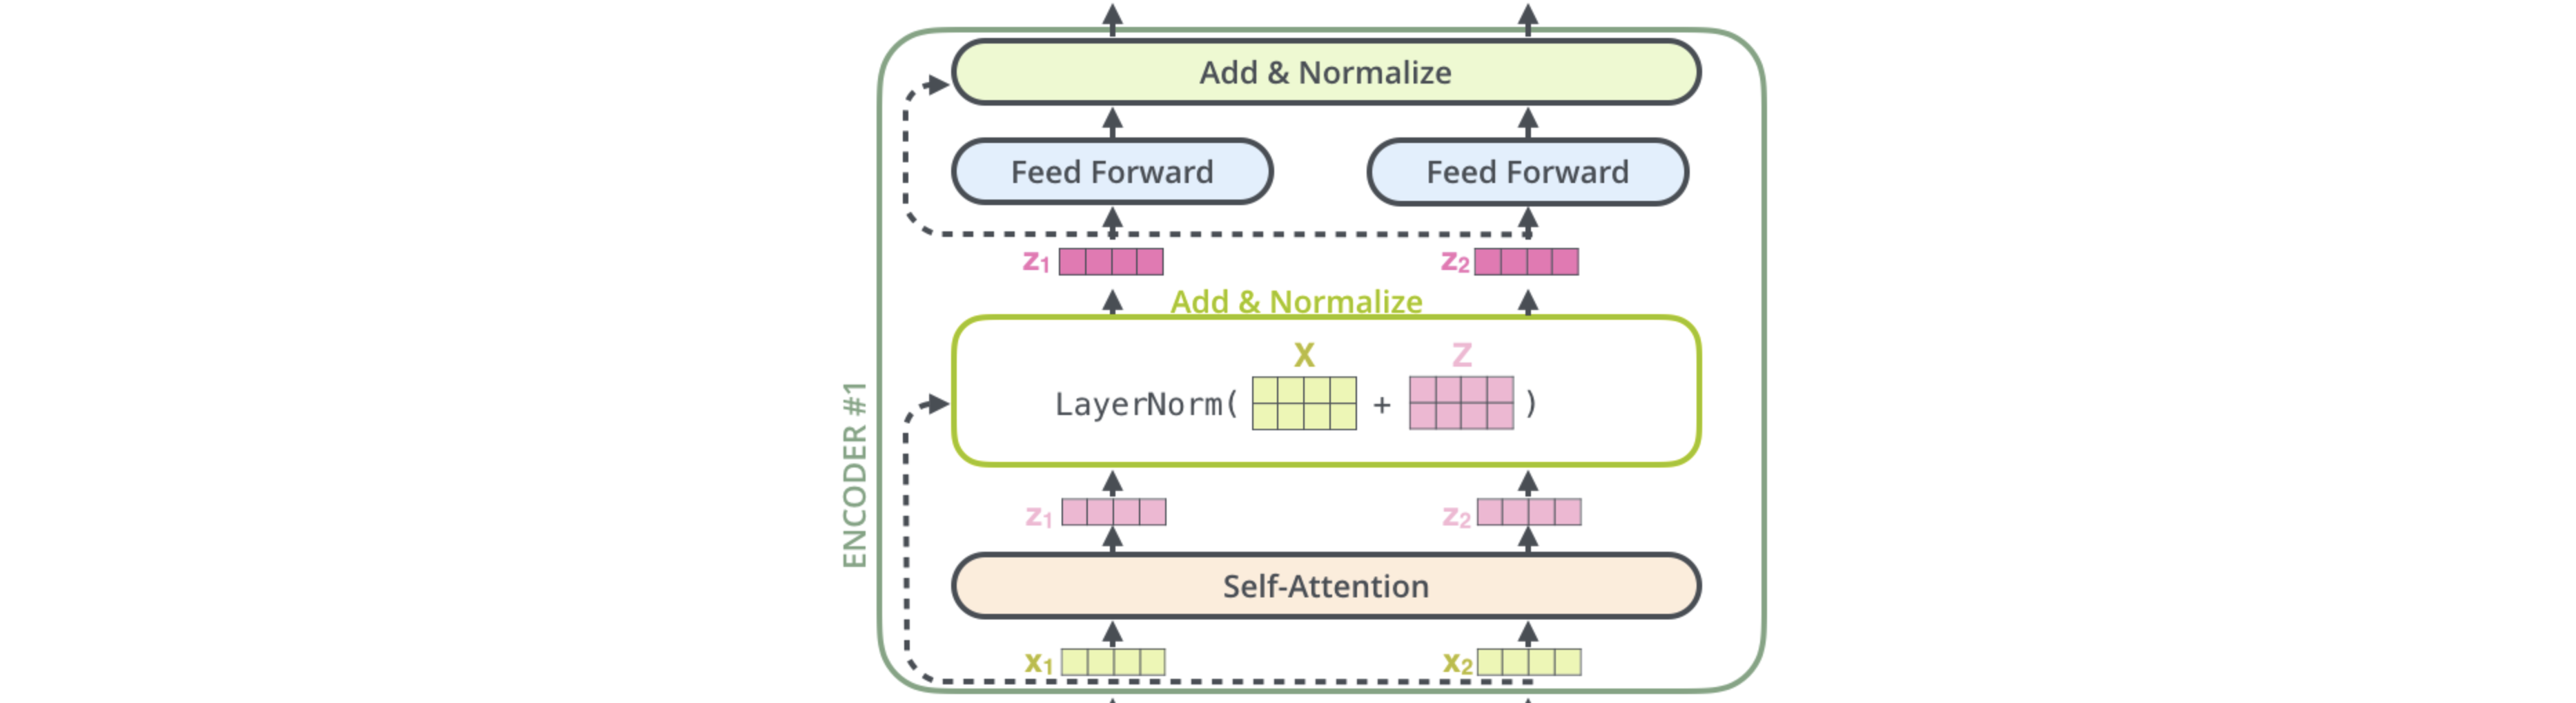

In [2]:
model = TransformerEncoderLayer(hidden=15, num_heads=3, fcn_hidden=71)
x = torch.randn(3, 7, 15)
output = model(x)

assert output.shape == (3, 7, 15), f"shape is incorrect, expected (3, 7, 15), got {output.shape}. Check your implementation."
print("All tests passed!")

All tests passed!


# Transformer Encoder

Now it's time to stack several layers of TransformerEncoderLayer and create TransformerEncoder.
Additionally, you need to first, embed the input ids and add positional encoding to them.

This time your module will not receive a FloatTensor as its input. Instead, it will receive the vocab_ids of the tokens in the text as LongTensor[batch_size, seq_len].

For example, given the text "A red fox in Västernorrlands Län", BPE tokenizer will split it into tokens

```
a red fox in vast ##ern ##or ##rland ##s lan
```

after which you can convert them into vocab_ids and wrap this into a LongTensor

```
[1037, 2417, 4419, 1999, 6565, 11795, 2953, 18324, 2015, 17595]
```

`Tokenizer` object does all of this for you, you just need to remember that your network input is `LongTensor[batch_size, seq_len]` and not `FloatTensor[batch_size, seq_len, hidden]`. It becomes this after the embedding operation.

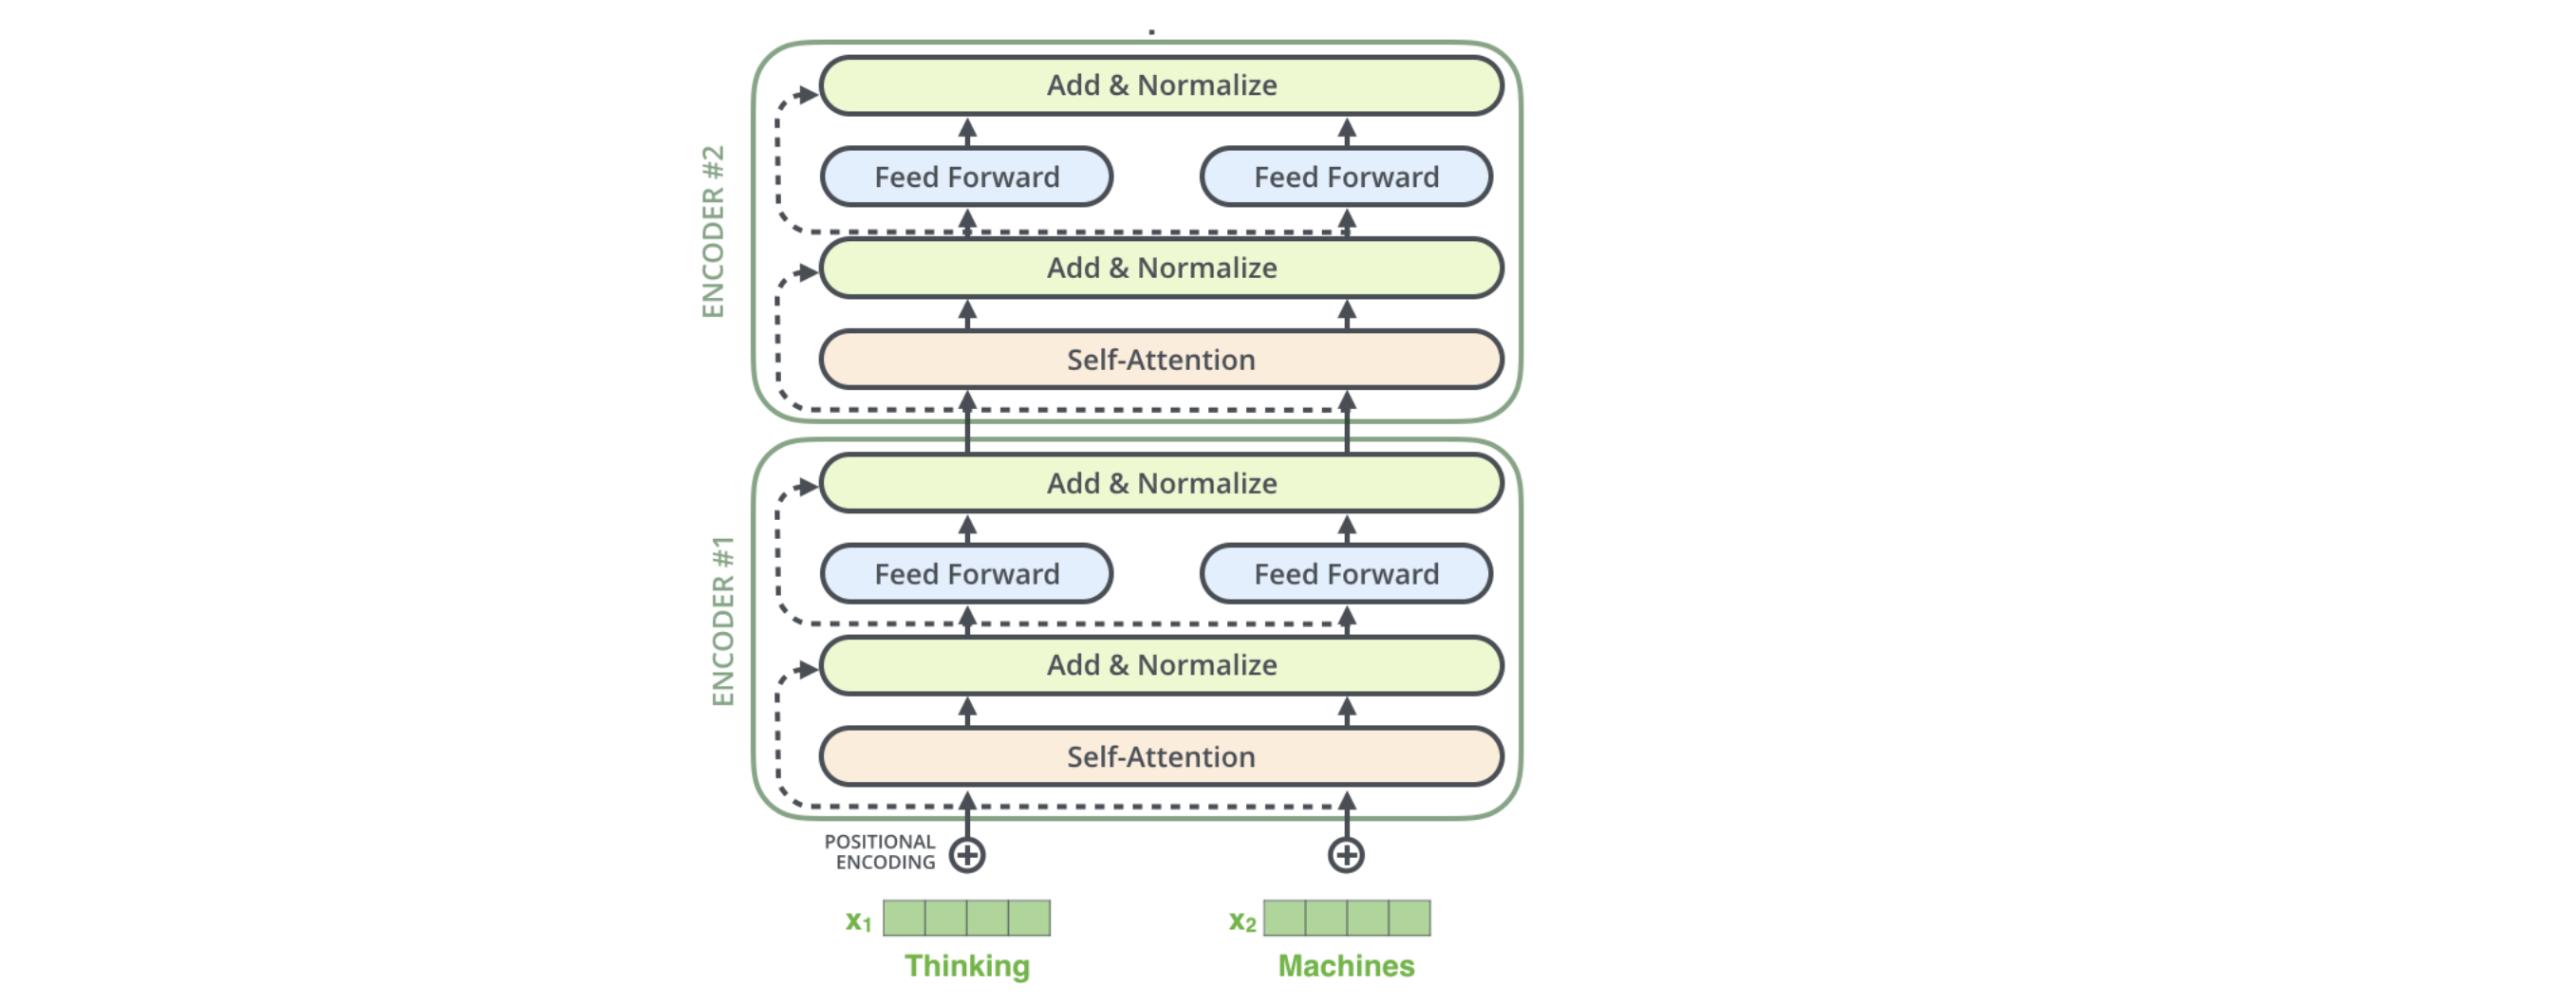

In [3]:
model = TransformerEncoder(num_layers=2, hidden=15, num_heads=3, fcn_hidden=71, vocab_size=100, max_seq_len=7)
x = torch.randint(0, 100, size=[3, 7])
output = model(x)

assert output.shape == (3, 7, 15), f"shape is incorrect, expected (3, 7, 15), got {output.shape}. Check your implementation."
print("All tests passed!")

All tests passed!


## Transformer Language Model

The final modeling step is to add a linear layer on top of a Causal Transformer Encoder to turn it into a language model. Go to `transformer_lm/modeling_transformer.py` and implement the `TransformerLM` class.

In [4]:
model = TransformerLM(num_layers=2, hidden=15, num_heads=3, fcn_hidden=71, vocab_size=100, max_seq_len=7)
x = torch.randint(0, 100, size=[3, 7])
output = model(x)

assert output.shape == (3, 7, 100), f"shape is incorrect, expected (3, 7, 100), got {output.shape}. Check your implementation."
print("All tests passed!")

All tests passed!


Image credit: Jay Alammar https://jalammar.github.io/illustrated-transformer